## Introduction
<details>
<summary>Details :</summary>

Name : Sumit Shamlal Chaure

Batch : 10

Program : Data Science with Python By SkillAcademy

Assignment : Capstone Project - Used Car Prediction & Deployment Using Streamlit

Topics : **Complete Data Science Project Lifecycle -** Data analytics, EDA, Model Building, Model Evaluation-Training-Testing of Model on sample Data, Model Deployment, Story-Telling & Report Deck.

> File Downloads :

 - [Assignment PDF](https://drive.google.com/file/d/12A-qzEXI_jzGuitXJKuPsIzvpXEWt8MI/view?usp=sharing)

 - [CSV Dataset](https://drive.google.com/uc?export=download&id=17KxRuOK4uONRZyfYNgjoX62y2yO5KpLY)

 - [Dataset Alternate Link](https://gist.github.com/Sumit-SC/7a0db90fe24c0e0d08d8bf750725d32e)


> My Reports & Files :

- [Drive Folder](https://drive.google.com/drive/folders/1N5m1mmKMZH1Fi7y2ZDdf6uMt88uW8CtS?usp=drive_link)

- [Report Pdf](https://drive.google.com/file/d/160omB-7Dn0wbcLvhi9pqknx8q6lyfRcQ/view?usp=drive_link)

- [Github Repo](https://github.com/Sumit-SC/Data-Science-Capstone-Project)
  
-  [Streamlit WebApp]()

*Note :* Certain markdown linkings like page links wont work on google colab/Jupyter but the same on github or vs-code would take you to respective breakpoints as they have advanced markdown support for inline tagging and MD linkings.

</details>

## Capstone Project (Complete  DS/ML lifecycle)

### Part 2 - Model Building,Training & Testing

---

<details>
<summary>Steps Involved in Machine Learning Projects (For Part 2 - Model Buidling)</summary>

~~1. Understanding the Problem Statement.~~

~~2. Data Collection (From Sources/API/Files).~~

~3. Data Checking for analysis.~~

~~4. Exploratory Data Analysis (To get insights of dataset & problem)~~

~~5. Data Pre-Processing.~~

6. Model Selection & evaluation.

7. Model Training.

8. Choosing the Best Model for Best results.

9.  Testing with new data & checking the factors such as recall, accuracy & precision.

10. Model Deployment

11. User testing & benchmarking etc.

12. Reiterating the steps with new data and building more accurate models.

</details>

### 1. Understanding the Problem & Dataset

Perform EDA and derive Insights from the CAR DETAILS
dataset using Various Data Analysis and Data Visualization
libraries of Python such as Pandas, Matplotlib & Seaborn.
Create and Deploy a ML Model Which can be accessed by all,using Streamlit and GitHub.

####
<details>
<summary>About Dataset</summary>

This dataset contains information about used cars.
This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.

The columns in the given dataset are as follows:

1. name
2. year
3. selling_price
4. km_driven
5. fuel
6. seller_type
7. transmission
8. Owner
</details>

<details>
<summary>
Questions
</summary>

1. Explore the Data using Excel . understand the data and prepare a
short summary about the dataset in the PPT.
2. Download the CAR DETAILS dataset and perform Data cleaning
and Data Pre-Processing if Necessary.
3. Use the various methods such as Handling null values, One-Hot
Encoding, Imputation and Scaling of Data Pre-Processing where
necessary.
4. Perform Exploratory data analysis (EDA) on the Data and perform
Graphical Analysis on the Data. Include the graphs with
conclusions from the Graphical Analysis.
5. Prepare the Data for Machine Learning modeling.
6. Apply various Machine Learning techniques such as Regression or
classification ,Bagging, Ensemble techniques and find out the
best model using various Machine Learning model evaluation
metrics.
7. Save the best model and Load the model.
8. Take the original data set and make another dataset by randomly
picking 20 data points from the CAR DETAILS dataset and apply
the saved model on the same Dataset and test the model.
9. Make a GitHub Account by visiting the GitHub Website. Create a
repository named Data Science Capstone Project and upload the
model with the dataset, code file.
10. Create a Streamlit Account by visiting the Streamlit Website.
Connect your GitHub account with streamlit.
11. Create an app.py file and other dependencies files for Streamlit
app to be deployed on Streamlit Cloud. Make a simple website
and deploy your ML model on Streamlit, Make the website public.
12. Share the Streamlit website and GitHub repository links in the
Project PPT.

</details>

---

### 2. Module Imports

In [53]:
import pandas as pd             # for data cleaning and data pre-processing, CSV file I/O,etc
import numpy as np              # linear algebra & for mathematical computation
import matplotlib.pyplot as plt # for visualization
%matplotlib inline
import seaborn as sns           # for visualization
from collections import Counter # to count occurrences
from tabulate import tabulate   # to make tables for results

import warnings                 # for warning removals in code output
warnings.filterwarnings('ignore')

# Scalers & Encoders
from sklearn.preprocessing import StandardScaler, LabelEncoder
#train-test split
from sklearn.model_selection import train_test_split
# Metrics
from sklearn.metrics import (mean_squared_error, r2_score)
# Model Libraries
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

import pickle           #to save and load model files as pkl file

#### Importing the Processed Dataset (With error handling)

In [54]:
# If you want to upload the dataset directly (Since on Google Colab it will be lost on re-run) - uncomment the below 2 line code and run
# from google.colab import files
# uploaded = files.upload()

file_path = "../data/processed/Processed CAR DETAILS.csv"
file_name = file_path.split("/")[-1]

try:
    # Reading the CSV file into a Pandas DataFrame
    df = pd.read_csv(file_path)
    # Store the filename as an attribute in the DataFrame
    df.file_name = file_name
    print(f"\n '{df.file_name}' loaded successfully.")

# Exception to check if the file has some error like no file at the path, etc.
except FileNotFoundError:
    print(f"Error: '{file_name}' not found at the specified location {
          file_path}.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


 'Processed CAR DETAILS.csv' loaded successfully.


In [55]:
df

,Brand,Model,Variant,Year,Car_Age,Km_Driven,Fuel,Seller_Type,Transmission,Owner,Selling_Price
0,Maruti,800,AC,2007,16,70000,Petrol,Individual,Manual,First Owner,60000
1,Maruti,Wagon R LXI,Minor,2007,16,50000,Petrol,Individual,Manual,First Owner,135000
2,Hyundai,Verna,1.6 SX,2012,11,100000,Diesel,Individual,Manual,First Owner,600000
3,Datsun,RediGO T,Option,2017,6,46000,Petrol,Individual,Manual,First Owner,250000
4,Honda,Amaze VX,i-DTEC,2014,9,141000,Diesel,Individual,Manual,Second Owner,450000
...,...,...,...,...,...,...,...,...,...,...,...
3189,Hyundai,i20 Magna,1.4 CRDi (Diesel),2014,9,80000,Diesel,Individual,Manual,Second Owner,409999
3190,Hyundai,i20 Magna,1.4 CRDi,2014,9,80000,Diesel,Individual,Manual,Second Owner,409999
3191,Maruti,800,AC BSIII,2009,14,83000,Petrol,Individual,Manual,Second Owner,110000
3192,Hyundai,Creta,1.6 CRDi SX Option,2016,7,90000,Diesel,Individual,Manual,First Owner,865000


### Machine Learning Steps

#### Encoding the Dataset (Q3 Part)

In [56]:
category_col = df.select_dtypes(include="object").columns
print(f"Categorical Columns in {df.file_name} :\n", category_col)

numerical_col = df.select_dtypes(include="number").columns
print(f"\nNumerical Columns in {df.file_name} :\n", numerical_col)

Categorical Columns in Processed CAR DETAILS.csv :
 Index(['Brand', 'Model', 'Variant', 'Fuel', 'Seller_Type', 'Transmission',
       'Owner'],
      dtype='object')

Numerical Columns in Processed CAR DETAILS.csv :
 Index(['Year', 'Car_Age', 'Km_Driven', 'Selling_Price'], dtype='object')


In [57]:
# One hot encoder
df_one = df.copy()

In [58]:
# Using Label Encoder to encode categorical data
label_encoder = LabelEncoder()  # instance of encoder
# Loop to  encode data in df
for feature in category_col:
    df_one[feature] = label_encoder.fit_transform(df[feature])
df_one.head()

,Brand,Model,Variant,Year,Car_Age,Km_Driven,Fuel,Seller_Type,Transmission,Owner,Selling_Price
0,11,4,540,2007,16,70000,4,1,1,0,60000
1,11,538,647,2007,16,50000,4,1,1,0,135000
2,9,508,309,2012,11,100000,1,1,1,0,600000
3,4,364,649,2017,6,46000,4,1,1,0,250000
4,8,34,717,2014,9,141000,1,1,1,2,450000


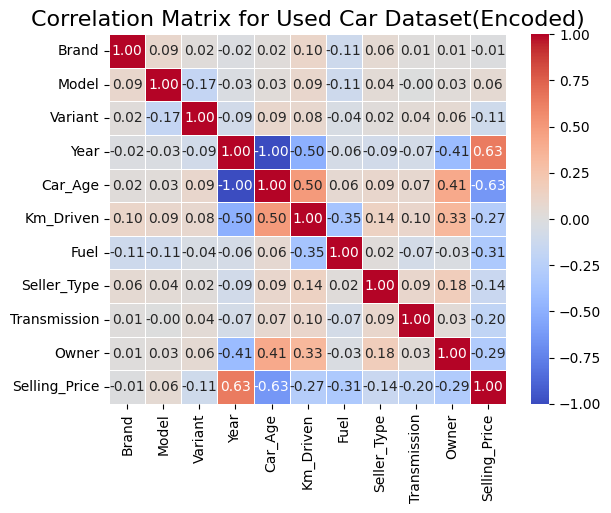

In [59]:
corr = df_one.corr()
sns.heatmap(corr, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix for Used Car Dataset(Encoded)", fontsize=16)
plt.savefig("../src/visualization/Correlation Graph - After Label Encoding")
plt.show()

In [60]:
x = df_one.drop(["Selling_Price"], axis=1)
y = df_one["Selling_Price"]

print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(3194, 10)
(3194,)


In [61]:
# splitting the dataset into 70% training data and 30% test data
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42
)
print(f"Split Check Test values : {3194 * 0.3} & Train values : {3194 * 0.7}")
# rows , columns
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

Split Check Test values : 958.1999999999999 & Train values : 2235.7999999999997
(2235, 10)
(959, 10)
(2235,)
(959,)


##### 4. Standarizing the dataset

In [62]:
sc = StandardScaler()
sc.fit_transform(X_train)
sc.transform(X_test)

array([[ 1.42929574,  0.3320674 , -0.80436368, ..., -1.9961589 ,
         0.23924353, -0.70878384],
       [-0.50807124,  1.58920064, -2.02594187, ...,  0.4551681 ,
         0.23924353, -0.70878384],
       [ 1.67146661, -1.37634444,  0.04843619, ...,  0.4551681 ,
         0.23924353,  0.89054164],
       ...,
       [-0.75024211, -0.98416185,  0.9888209 , ..., -1.9961589 ,
         0.23924353, -0.70878384],
       [-0.02372949, -1.50528119, -0.16361135, ...,  0.4551681 ,
         0.23924353,  0.89054164],
       [ 1.42929574,  1.49787045,  0.01155835, ...,  0.4551681 ,
         0.23924353, -0.70878384]])

In [63]:
# Create a list of models
models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    RandomForestRegressor(),
    KNeighborsRegressor(),
    DecisionTreeRegressor(),
    GradientBoostingRegressor(),
    AdaBoostRegressor(),
]

# Define a list of model names
model_names = [
    "Linear Regression",
    "Ridge Regression",
    "Lasso Regression",
    "Random Forest",
    "k-Nearest Neighbors",
    "Decision Tree",
    "Gradient Boosting",
    "Ada Boost",
]

# Initialize variables to keep track of the best model
best_model_name = None
best_r2_score = -float("inf")
best_model = None

# Initialize an empty list to store results
all_results = []

# Function to evaluate regression models


def evaluate_regression_model(model, model_name, X_test, y_test):
    y_pred = model.predict(X_test)

    # Mean Squared Error and R-squared Score
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Display results in tabular format
    results_table = [
        ["Model", model_name],
        ["Mean Squared Error", mse],
        ["R-squared Score", r2],
    ]

    print(tabulate(results_table, headers=[
          "Metric", "Value"], tablefmt="heavy_grid"))

    # Store results in the dictionary
    return {
        "Model": model_name,
        "Mean Squared Error": mse,
        "R-squared Score": r2,
    }


# Iterate over the models
for model, model_name in zip(models, model_names):
    print(f"\n{('-' * 40)}\n{model_name}\n{('-' * 40)}")

    # Train the model
    model.fit(X_train, y_train)

    # Evaluate and store results for regression model
    results = evaluate_regression_model(model, model_name, X_test, y_test)
    all_results.append(results)

    # Update the best model if needed
    if results["R-squared Score"] > best_r2_score:
        best_r2_score = results["R-squared Score"]
        best_model_name = model_name
        best_model = model

# Create a DataFrame from the results
results_df = pd.DataFrame(all_results)

# Sorting the dataframe by 'R-squared Score' in descending order
sorted_results_df = results_df.sort_values(
    by="R-squared Score", ascending=False)

# Displaying the sorted dataframe
print("\nSorted Models by R-squared Score:")
print(sorted_results_df)

# Print the best model based on R-squared score
print(f"\nBest Model based on R-squared Score: {best_model_name}")


----------------------------------------
Linear Regression
----------------------------------------
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃ Metric             ┃ Value               ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━┫
┃ Model              ┃ Linear Regression   ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━┫
┃ Mean Squared Error ┃ 29779822603.25558   ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━┫
┃ R-squared Score    ┃ 0.49846204562348506 ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━━━━━━━━━━┛

----------------------------------------
Ridge Regression
----------------------------------------
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃ Metric             ┃ Value               ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━┫
┃ Model              ┃ Ridge Regression    ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━┫
┃ Mean Squared Error ┃ 29781816397.19765   ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━┫
┃ R-squared Score    ┃ 0.49842846707103783 ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━

┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓
┃ Metric             ┃ Value              ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━┫
┃ Model              ┃ Random Forest      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━┫
┃ Mean Squared Error ┃ 14243318148.742126 ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━┫
┃ R-squared Score    ┃ 0.7601206446719038 ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━━━━━━━━━┛

----------------------------------------
k-Nearest Neighbors
----------------------------------------
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metric             ┃ Value                ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━┫
┃ Model              ┃ k-Nearest Neighbors  ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━┫
┃ Mean Squared Error ┃ 57714349823.478676   ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━━━━━┫
┃ R-squared Score    ┃ 0.028001699866618712 ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━━━━━━━━━━━┛

----------------------------------------
Decision Tree
-------------------------------

#### Model performance table (Basic)

In [64]:
model_performance = pd.DataFrame(results_df)
model_performance

,Model,Mean Squared Error,R-squared Score
0,Linear Regression,2.977982e+10,0.498462
1,Ridge Regression,2.978182e+10,0.498428
2,Lasso Regression,2.977984e+10,0.498462
3,Random Forest,1.424332e+10,0.760121
4,k-Nearest Neighbors,5.771435e+10,0.028002
5,Decision Tree,2.479270e+10,0.582453
6,Gradient Boosting,1.559031e+10,0.737435
7,Ada Boost,3.230153e+10,0.455993


### Q7. Save the best model and Load the model.

#### Best Model Selection & saving as final model (Manual Hard-codeing method)

In [65]:
# Manually coding the best model name and changing the below parameter
# f_modelname = "Logistic Regression"
# final_model = LogisticRegression(max_iter=10000, C=1.0, solver="lbfgs")
# final_model.fit(x, y)

#### Saving the best model for testing

In [66]:
# Models to evaulate the name and relevant parameter to take for best fit model fitting
models_dict = {
    "Logistic Regression": LogisticRegression(max_iter=1000, C=1.0, solver="lbfgs"),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "k-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5, weights="uniform"),
    "Decision Tree": DecisionTreeClassifier(
        max_depth=None, min_samples_split=2, min_samples_leaf=1
    ),
    "Random Forest": RandomForestClassifier(
        n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1
    ),
    "AdaBoost": AdaBoostClassifier(n_estimators=50, learning_rate=1.0),
    "Gradient Boosting": GradientBoostingClassifier(
        n_estimators=100, learning_rate=0.1, max_depth=3
    ),
}
# Retrieve the value using the key
retrieved_value = models_dict.get(best_model_name)

if retrieved_value is not None:
    selected_model_name = best_model_name
    selected_model = best_model
    # selected_model_params = retrieved_value.get_params()
    print(f"Best Model Name: {selected_model_name}")
    print(f"\nRetrieved Model Instance: {selected_model}")

Best Model Name: Random Forest

Retrieved Model Instance: RandomForestRegressor()


#### Storing the best model details

In [67]:
# Automating the above hardcoded values by using the above dictonary and for loop
f_modelname = selected_model_name
f_model = selected_model
print(f"Best Selected Model name : '{
      f_modelname}' & \nits parameters :\n{f_model.get_params()}")
final_model = f_model
final_model.fit(x, y)

Best Selected Model name : 'Random Forest' & 
its parameters :
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


RandomForestRegressor()

#### Saving Model as pickle file and dumping it to use later on

In [68]:
# wb - writing binary
pickle.dump(final_model, open(f"{f_modelname}.pkl", "wb"))

#### Loading the saved model

In [69]:
load_model = pickle.load(open(f"{f_modelname}.pkl", "rb"))  # rb = read binary
print(f"Name of loaded Model : {f_modelname}")
load_model

Name of loaded Model : Random Forest


RandomForestRegressor()

#### Testing the loaded model and predicting on test dataset

In [70]:
# Testing the imported model
print("Length of test data: ", len(load_model.predict(X_test)))
load_model.predict(X_test)

Length of test data:  959


array([ 314699.94      ,  258699.36      ,  540989.97      ,
        479849.99      ,  743890.        ,  247613.32333333,
         74520.        ,  478599.35      ,  269140.        ,
         86550.        ,  584670.        ,  165359.99      ,
        577124.99      ,  386024.99      ,   89619.99      ,
        310600.        ,  319870.        ,  385909.97      ,
        236659.99      ,  279519.97      ,  325449.98      ,
        415650.        , 1116259.99      ,  160869.94      ,
        155440.        ,  155269.99      ,  312950.        ,
        119981.95      ,  772999.99      ,  703000.        ,
        621950.        ,  300610.        ,   99993.33333333,
        741910.        ,  309010.        ,  230559.99      ,
        350199.98      ,  208190.        ,  288850.        ,
        147599.97      ,  734909.96      ,   74310.        ,
        359479.99      ,  135699.98      ,  115750.        ,
        270899.36      ,  521399.97      ,  344000.        ,
        263620.        ,

### Q8. Take the original data set and make another dataset by randomly picking 20 data points from the CAR DETAILS dataset and apply the saved model on the same Dataset and test the model.

#### Generating sample data from cleaned df to test on the trained model.

In [71]:
random_datasample = df_one.sample(20)
random_datasample_df = random_datasample.drop("Selling_Price", axis=1)
print(random_datasample_df.shape)
random_datasample_df.head()

(20, 10)


,Brand,Model,Variant,Year,Car_Age,Km_Driven,Fuel,Seller_Type,Transmission,Owner
1526,16,277,660,2019,4,15000,4,1,1,0
1634,11,465,563,2015,8,87000,1,1,1,4
2209,9,156,649,2018,5,42000,1,1,1,0
472,9,223,66,2017,6,19890,4,0,0,0
2637,9,410,621,2006,17,60000,4,0,1,2


#### Resetting the index as the randomly generated data has no continuos index (wil delete later,just for understanding)

In [72]:
random_datasample_df.reset_index()

,index,Brand,Model,Variant,Year,Car_Age,Km_Driven,Fuel,Seller_Type,Transmission,Owner
0,1526,16,277,660,2019,4,15000,4,1,1,0
1,1634,11,465,563,2015,8,87000,1,1,1,4
2,2209,9,156,649,2018,5,42000,1,1,1,0
3,472,9,223,66,2017,6,19890,4,0,0,0
4,2637,9,410,621,2006,17,60000,4,0,1,2
5,1070,14,308,656,2011,12,90000,1,1,1,2
6,1444,11,471,562,2010,13,79357,1,0,1,0
7,1333,11,447,150,2005,18,67000,4,1,1,0
8,359,9,223,677,2015,8,61690,4,0,1,0
9,2484,18,564,487,2010,13,70000,1,1,1,2


#### Saving the random sample dataset and removing the index

In [73]:
random_datasample_df.to_csv("20_random_sample.csv", index=False)

#### Loading the sample data and checking basics

In [74]:
testsample_df = pd.read_csv("20_random_sample.csv")
print(
    "Shape of loaded sample dataframe:",
    testsample_df.shape,
    "\n\nSample Dataframe contents",
)
testsample_df

Shape of loaded sample dataframe: (20, 10) 

Sample Dataframe contents


,Brand,Model,Variant,Year,Car_Age,Km_Driven,Fuel,Seller_Type,Transmission,Owner
0,16,277,660,2019,4,15000,4,1,1,0
1,11,465,563,2015,8,87000,1,1,1,4
2,9,156,649,2018,5,42000,1,1,1,0
3,9,223,66,2017,6,19890,4,0,0,0
4,9,410,621,2006,17,60000,4,0,1,2
5,14,308,656,2011,12,90000,1,1,1,2
6,11,471,562,2010,13,79357,1,0,1,0
7,11,447,150,2005,18,67000,4,1,1,0
8,9,223,677,2015,8,61690,4,0,1,0
9,18,564,487,2010,13,70000,1,1,1,2


#### Making Predictions on sample dataset against the trained model

In [75]:
# making prediction on random data
predicted_data = load_model.predict(testsample_df)
print(f"The predicted data from {f_modelname} model:\n", predicted_data)

The predicted data from Random Forest model:
 [355400.         407700.         814949.84       548089.99
 105999.85       188199.99       298020.         136593.33333333
 388000.         209899.98       343300.         751429.98
 550916.66666667 447899.99       380199.98       125700.
 395340.         329329.9        448300.         450816.65666667]


#### Comparision of Actual and Predicted values by the model

In [81]:

# Compare the actual data and predicted data
prediction_data = random_datasample.copy()
prediction_data["predicted_target"] = predicted_data

# Calculate the absolute percentage difference
prediction_data["percentage_difference"] = abs(
    (random_datasample["Selling_Price"] - predicted_data) /
    random_datasample["Selling_Price"]
) * 100

# Print the actual and predicted data
print(f"Actual Data and Predicted Data Comparison based on {
      f_modelname} model:\n")

# Display the results where the absolute percentage difference is less than or equal to 20%
safe_predictions = prediction_data[prediction_data["percentage_difference"] <= 20]

# Print the safe predictions
print("Safe Predictions:")
print(safe_predictions[["Selling_Price",
      "predicted_target", "percentage_difference"]])

# Print the count and percentage of safe predictions
safe_percentage = (len(safe_predictions) / len(prediction_data)) * 100
print(f"\nPercentage of Safe Predictions: {safe_percentage:.2f}%")

if safe_percentage >= 90:
    print(
        f"\nOur model based on '{f_modelname}' is well trained, with {
            safe_percentage:.2f}% safe predictions."
    )
else:
    print(
        f"Our model based on '{f_modelname}' needs more training to improve safety, currently at {
            safe_percentage:.2f}% safe predictions."
    )
# Save the results as a DataFrame
final_results_df = prediction_data[[
    "Selling_Price", "predicted_target", "percentage_difference"]]

final_results_df.to_csv('final_results.csv', index=False)

Actual Data and Predicted Data Comparison based on Random Forest model:

Safe Predictions:
      Selling_Price  predicted_target  percentage_difference
1526         300000     355400.000000              18.466667
1634         400000     407700.000000               1.925000
2209         815000     814949.840000               0.006155
472          550000     548089.990000               0.347275
2637         100000     105999.850000               5.999850
1444         325000     298020.000000               8.301538
1333         160000     136593.333333              14.629167
359          400000     388000.000000               3.000000
2067         300000     343300.000000              14.433333
1117         802000     751429.980000               6.305489
796          555000     550916.666667               0.735736
1991         470000     447899.990000               4.702130
2735         400000     380199.980000               4.950005
2677         110000     125700.000000              14.2

### **Extra** - Saving the output in a csv file and also inside a text file for reference.

### Saving the final results in a output text file

In [85]:
# Output file path for saving results
output_file_path = 'final_results.txt'

# Open the file in write mode
with open(output_file_path, 'w') as f:
    # Write the DataFrame to the file
    f.write(final_results_df.to_string())

    # Add a separator and header for additional information
    f.write('\n\n---------------------------------------\n')
    f.write(f"Printing the results of our {
            f_modelname} prediction on random 20 data samples.\n")

    # Number of correct predictions
    correct_predictions = sum(
        final_results_df['Selling_Price'] == final_results_df['predicted_target']
    )

    # Total predictions
    total_predictions = len(final_results_df)

    # Calculate the percentage of correct predictions
    percentage_correct_predictions = (
        correct_predictions / total_predictions) * 100

    f.write(f"Number of correct predictions: {correct_predictions}\n")
    f.write(f"Percentage of correct predictions: {
            percentage_correct_predictions:.2f}%\n")

    # Check if the absolute percentage difference is less than or equal to 20%
    safe_predictions = final_results_df[final_results_df["percentage_difference"] <= 20]
    safe_percentage = (len(safe_predictions) / total_predictions) * 100

    f.write(f"\nNumber of safe predictions (Absolute Percentage Difference <= 20%): {
            len(safe_predictions)}\n")
    f.write(f"Percentage of safe predictions: {safe_percentage:.2f}%\n")

    # Print the result in the output file
    if safe_percentage >= 80:
        f.write(f"\nOur model based on '{f_modelname}' is well trained, with {
                safe_percentage:.2f}% safe predictions.\n")
    else:
        f.write(f"Our model based on '{f_modelname}' needs more training to improve safety, currently at {
                safe_percentage:.2f}% safe predictions.\n")

# Print the confirmation message
print(f"Results saved in {output_file_path}")

Results saved in final_results.txt
